<a href="https://colab.research.google.com/github/benasphy/KNN/blob/main/iphone_purchase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   Salary           400 non-null    int64 
 3   Purchase Iphone  400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB
   Gender  Age  Salary  Purchase Iphone
0    Male   19   19000                0
1    Male   35   20000                0
2  Female   26   43000                0
3  Female   27   57000                0
4    Male   19   76000                0
Accuracy: 0.93
              precision    recall  f1-score   support

           0       0.96      0.92      0.94        52
           1       0.87      0.93      0.90        28

    accuracy                           0.93        80
   macro avg       0.91      0.93      0.92        80
weighted avg       0.93      0.93      0.93     

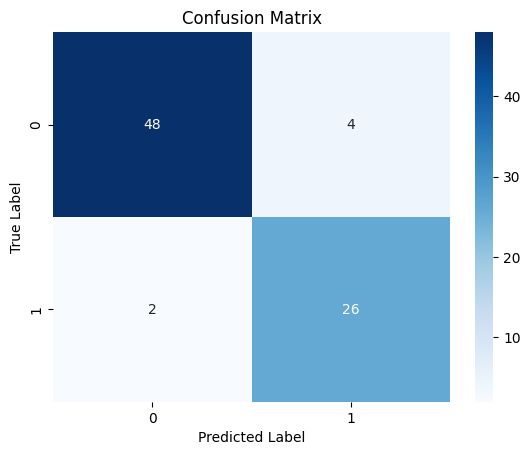

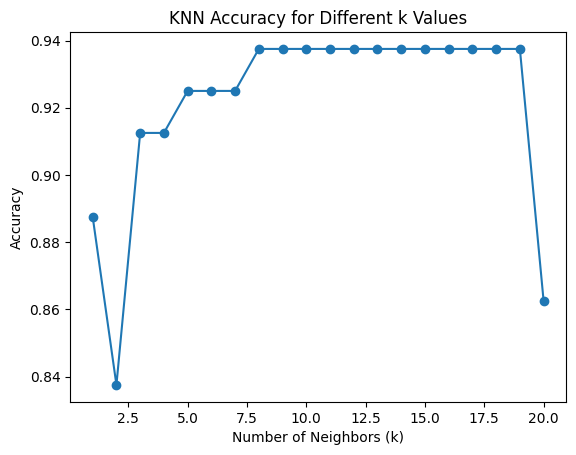

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import LabelBinarizer # Import LabelBinarizer for one-hot encoding

# Load the dataset
data = pd.read_csv('/content/iphone_purchase_records.csv')

# Display basic info and first few rows
data.info()
print(data.head())

# Assuming the last column is the target variable and the rest are features
X = data.iloc[:, :-1] # Keep as DataFrame for one-hot encoding
y = data.iloc[:, -1].values

# One-hot encode the 'Gender' column
encoder = LabelBinarizer()
gender_encoded = encoder.fit_transform(X['Gender'])

# Create new columns for encoded gender
# Instead of directly assigning, create a DataFrame from the encoded array
encoded_df = pd.DataFrame(gender_encoded, columns=['Male'], index=X.index)

# If you need 'Female' column, you can derive it from 'Male' (since it's binary)
encoded_df['Female'] = 1 - encoded_df['Male']

X = X.drop('Gender', axis=1) # Drop original 'Gender' column
X = pd.concat([X, encoded_df], axis=1) # Concatenate encoded columns
# Now convert X to numpy array
X = X.values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the KNN model
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Finding the optimal k value
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# Plotting k values vs accuracy
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for Different k Values')
plt.show()

